# Introdution
In this project, we need to help an e-learning comopany that offers courses on programming to find the correct market to do advertisment. We want to promote our product and we'd like to invest some money in advertisement, so our goal is to find out the two best markets to advertise our product in.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this https://github.com/freeCodeCamp/2017-new-coder-survey. 

## Business question to answer:
What are the two best markets to advertise our product in?

## Understand the data set 

In [26]:
import pandas as pd
import numpy as ny
df=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We want to offer classes that new coders are interested in and the price of class are affordable for them. Plus, we are intersted in where are those new coders located. Therefore, we have direction to start this project. 

1,Where are these new coders located.
2,What are the locations with the greatest number of new coders.
3,How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

# Check for Sample Representativity

In [24]:
list(df.columns)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

Firstly, we can know which field that coders are interested in by looking at JobRoleInterest columns

In [29]:
# Frequency distribution table for 'JobRoleInterest'
df['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

From a quick scan we can find: 
1, Many people are interested in web development
2, Fewer people are interested in mobile development
3, Fewer people are interested in other subject other than web and mobile development

I also found that people are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

1,Split each string in the JobRoleInterest column to find the number of options for each participant.
2,We'll first drop the null values because we can't split Nan values.
3,Generate a frequency table for the variable describing the number of options.

In [38]:
#drop na in the columns and split interest
interest_nonull=df['JobRoleInterest'].dropna()
splitted_interest=interest_nonull.str.split(',')

#frequency table number of options 
number_of_options=splitted_interest.apply(lambda x: len(x)) #x is the list of jobroleinteret
number_of_options.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Above frequency table shows that 31.7% of people have only one subject interest.
We focus on course of web and mobile,the next step is to find out how many respondents chose at least one of these two options.

([<matplotlib.axis.XTick at 0x7f06d8221748>,
 <a list of 2 Text xticklabel objects>)

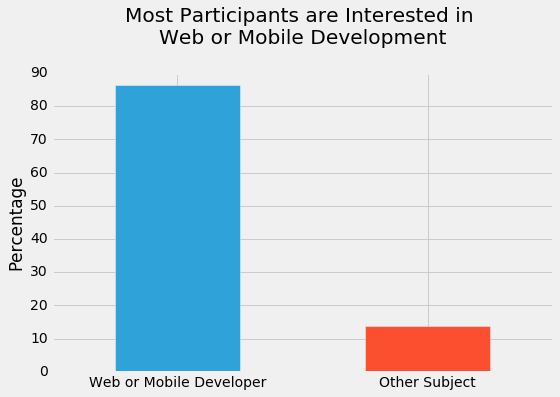

In [60]:
import re 
web_or_mob=interest_nonull.str.contains('Web Developer|Mobile Developer',re.IGNORECASE)
fre_table=web_or_mob.value_counts(normalize=True)*100

#visulize data
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
fre_table.plot.bar(figsize=(8,5))
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or Mobile Developer','Other Subject'],rotation=0)


Based on the bar chart, we can see over 85% of people are interested in at least one of those 2 subject, which means that this sample representative for our population of interest.

The next step is to find out: 
1, Where are these coders located in?
2, How much coders spent on programming learning? 
3, What locations have the greatest number of new coders?

# Location and Densities Analysis 

Look back at the columns, we found 2 columns indicating location information-CountryLive & CountryCitizen. For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born. Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [65]:
#take rows that is notnul from Jobroleinterest column instead of drop null value
df2=df[df['JobRoleInterest'].notna()]

#calculate frequencies
absolute_frequencies=df2['CountryLive'].value_counts()
relative_frequencies=df2['CountryLive'].value_counts(normalize=True)*100

#Create a table shows number of coders and percentage
pd.DataFrame(data={'Absolute Frequency': absolute_frequencies,'Relative_Frequency':relative_frequencies})

,Absolute Frequency,Relative_Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From the frequency table we can narrow down 4 countries to perform further analysis. 
45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

The next step is to find out how much coders spent on per month. We only work take the top 4 countries to analyse in the further analysis. 

In [67]:
#Some students answered that they had been learning to code for 
#0 months (it might be that they had just started when they completed the survey). 
#To avoid dividing by 0, replace all the values of 0 with 1.
df2['MonthsProgramming'].replace(0,1,inplace=True)

#create spent_per_month column
df2['spent_per_month']=df2['MoneyForLearning']/df2['MonthsProgramming']

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [70]:
#Find out how many null values there are in the new column
df2['spent_per_month'].isnull().sum()

675

In [72]:
#Keep only the rows that don't have a null value for the spent_per_month column
df3=df2[df2['spent_per_month'].notna()]

In [73]:
#Remove also any rows that have null values in the CountryLive column.
df4=df3[df3['CountryLive'].notna()]

The next step is to compute the average value spent per month in each country by a student.

In [97]:
four_countries=df4.groupby('CountryLive')['spent_per_month'].mean()
four_countries[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spent_per_month, dtype: float64

Compared India and UK/Canada, we'd intuitively expect people in the UK and Canada to spend more on learning than people in India. It could mean that there are outlier in india so the average spent per month is higher than UK and Canada. 

Outliers in each country has to be checked in the following steps. 

# Checking Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f06c5d29470>,
 <a list of 4 Text xticklabel objects>)

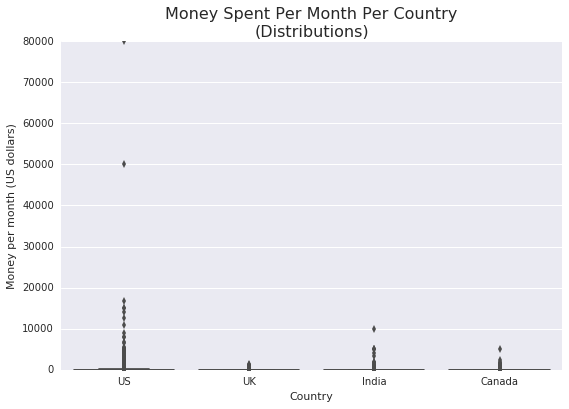

In [100]:
#take 4 countries out
only_4=df4[df4['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

#visualize outliers
import seaborn as sns
sns.boxplot(data=only_4,x='CountryLive',y='spent_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks([0,1,2,3],['US', 'UK', 'India', 'Canada'])


It is difficult to see outliner from india, but we can see there are 2 outliers in US. It is impossible that they spent over $50000 on learning per month. I am going to narrow down the range from $0 to $20000.

In [103]:
narrow_1=df4.loc[df4['spent_per_month']<=20000,]


# Recompute mean sum of money spent by students each month
countries_mean = narrow_1.groupby('CountryLive').mean()
countries_mean['spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]


CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spent_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



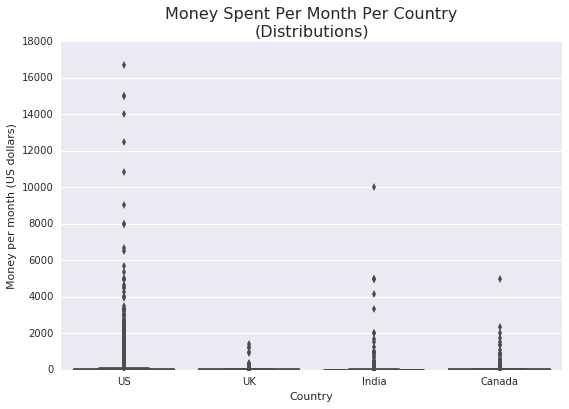

In [106]:
#take out 4 countries data again
only_4=narrow_1[narrow_1['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
sns.boxplot(y = 'spent_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [109]:
# Inspect the extreme outliers for India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['spent_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spent_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


These persons did not attend bootcamp, there is no reason that they spent over $2500 per month. I am going to remove them.

In [110]:
#remove the outliers for india
only_4=only_4.drop(india_outliers.index) #remove rows by row index

In [112]:
#Check the outliers for US 
us_outliers=only_4[(only_4['CountryLive']=='United States of America') 
                 & (only_4['spent_per_month']>=6000)] 
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spent_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


There are 6 persons out of 11 attending bootcamps,which means other 5 repsondents will be removed. 

For those 6 persons who attended bootcamps, I need to investcate how long they have been in the bootcamps. If they have been bootcamps less than 3 months, which means that the spent per month is unrealistic. Then, I can remove them. So the next is: 
I will remove respondents that:

1,Didn't attend bootcamps.
2,Had been programming for three months or less when at the time they completed the survey.

In [114]:
#remove 5 people who did not attend bootcamp
no_bootcamp=only_4[(only_4['CountryLive']=='United States of America') & (only_4['spent_per_month']>=6000)
      & (only_4['AttendedBootcamp']==0)]

only_4=only_4.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['spent_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [122]:
#Check outlier for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['spent_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spent_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


 The situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. I am going to remove it.

In [123]:
only_4=only_4.drop(canada_outliers.index)

After removing all outliers, mean of spent per month for each country can be recalculated. The result will be more arrcurate. 

In [124]:
only_4.groupby('CountryLive')['spent_per_month'].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: spent_per_month, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

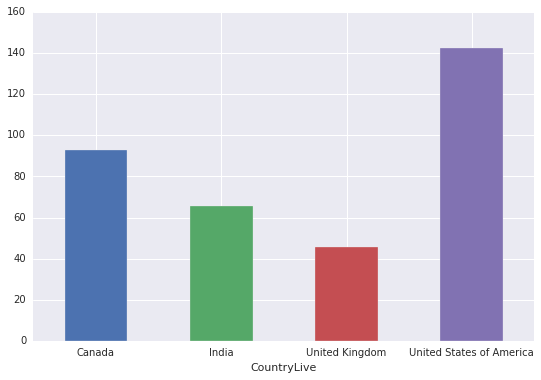

In [146]:
updated_mean=only_4.groupby('CountryLive')['spent_per_month'].mean()
updated_mean.plot.bar()
plt.xticks(rotation=0)


In [132]:
# Frequency table for the 'CountryLive' column
potential_coders=only_4['CountryLive'].value_counts(normalize = True) * 100

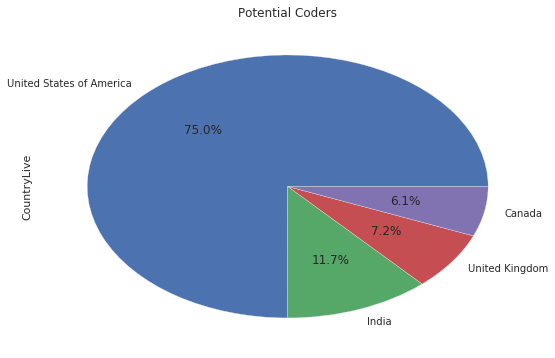

In [142]:
potential_coders.plot.pie(autopct='%1.1f%%')
plt.title('Potential Coders')

# Select the Best Two Markets 

US is the first option for us, without any questions. People spent $143 per month on learning and its potenetial coders is the most. It is kind of difficult to decide the second marktet we should go to. Based on the mean of spend per month data, Canada is the one we should go to due to the spent per month is the second high, $93, but when we look at the potential coders number, canada has lower number compared with India. Spent per month of india is $66 which is not a small number compared to the cost of our course,$59 per moneth. In other words, peoople in india has ability to buy course from us and its potential customers is twice than Canada. 

There is no a clear answer for the second market.However, we still can come up somes proposals. 

Proposal A: 
Mainly advertise in US market, split the rest advertis budget on India & Canada.
   .50% for the US, 30% for Canada,20% for India
   .65% for the US, 20% for Canada, 15% for India

Proposal B: 
Advertise in US, India/Canada
   .70% for the US,30% for Canada
   .70% for the US,30% for India

After we lock down markets that we should run ads, we can provide more informations to make detailed decisons. In these markets, who are our target customers? students,entry level employees or experience employees? What industries are they in and how old are they? The more information about the potential coders, the higher return of advertiment investment. 